In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:ylabel='Count'>

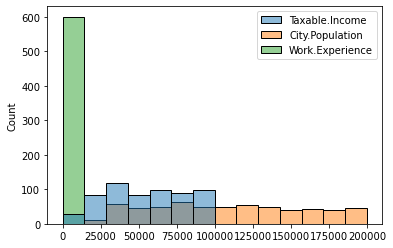

In [6]:
sns.histplot(df)

In [7]:
def split(num):
    if num <= 30000:
        return "Risky"
    else:
        return "Good"

df["Taxable.Income"]=df["Taxable.Income"].apply(split)

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [9]:
#Label encoding dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
df['Urban']=le.fit_transform(df['Urban'])

<AxesSubplot:>

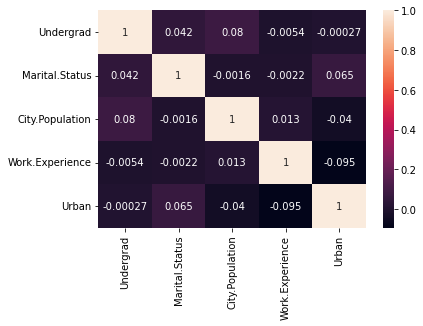

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [12]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

In [14]:
x=df.iloc[:,df.columns!="Taxable.Income"]
y=df['Taxable.Income']

In [15]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Building Decision Tree Classifier using Entropy Criteria

In [16]:
model=DE (criterion="entropy",max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

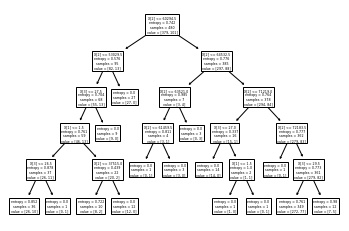

In [17]:
#PLot the decision tree
tree.plot_tree(model);

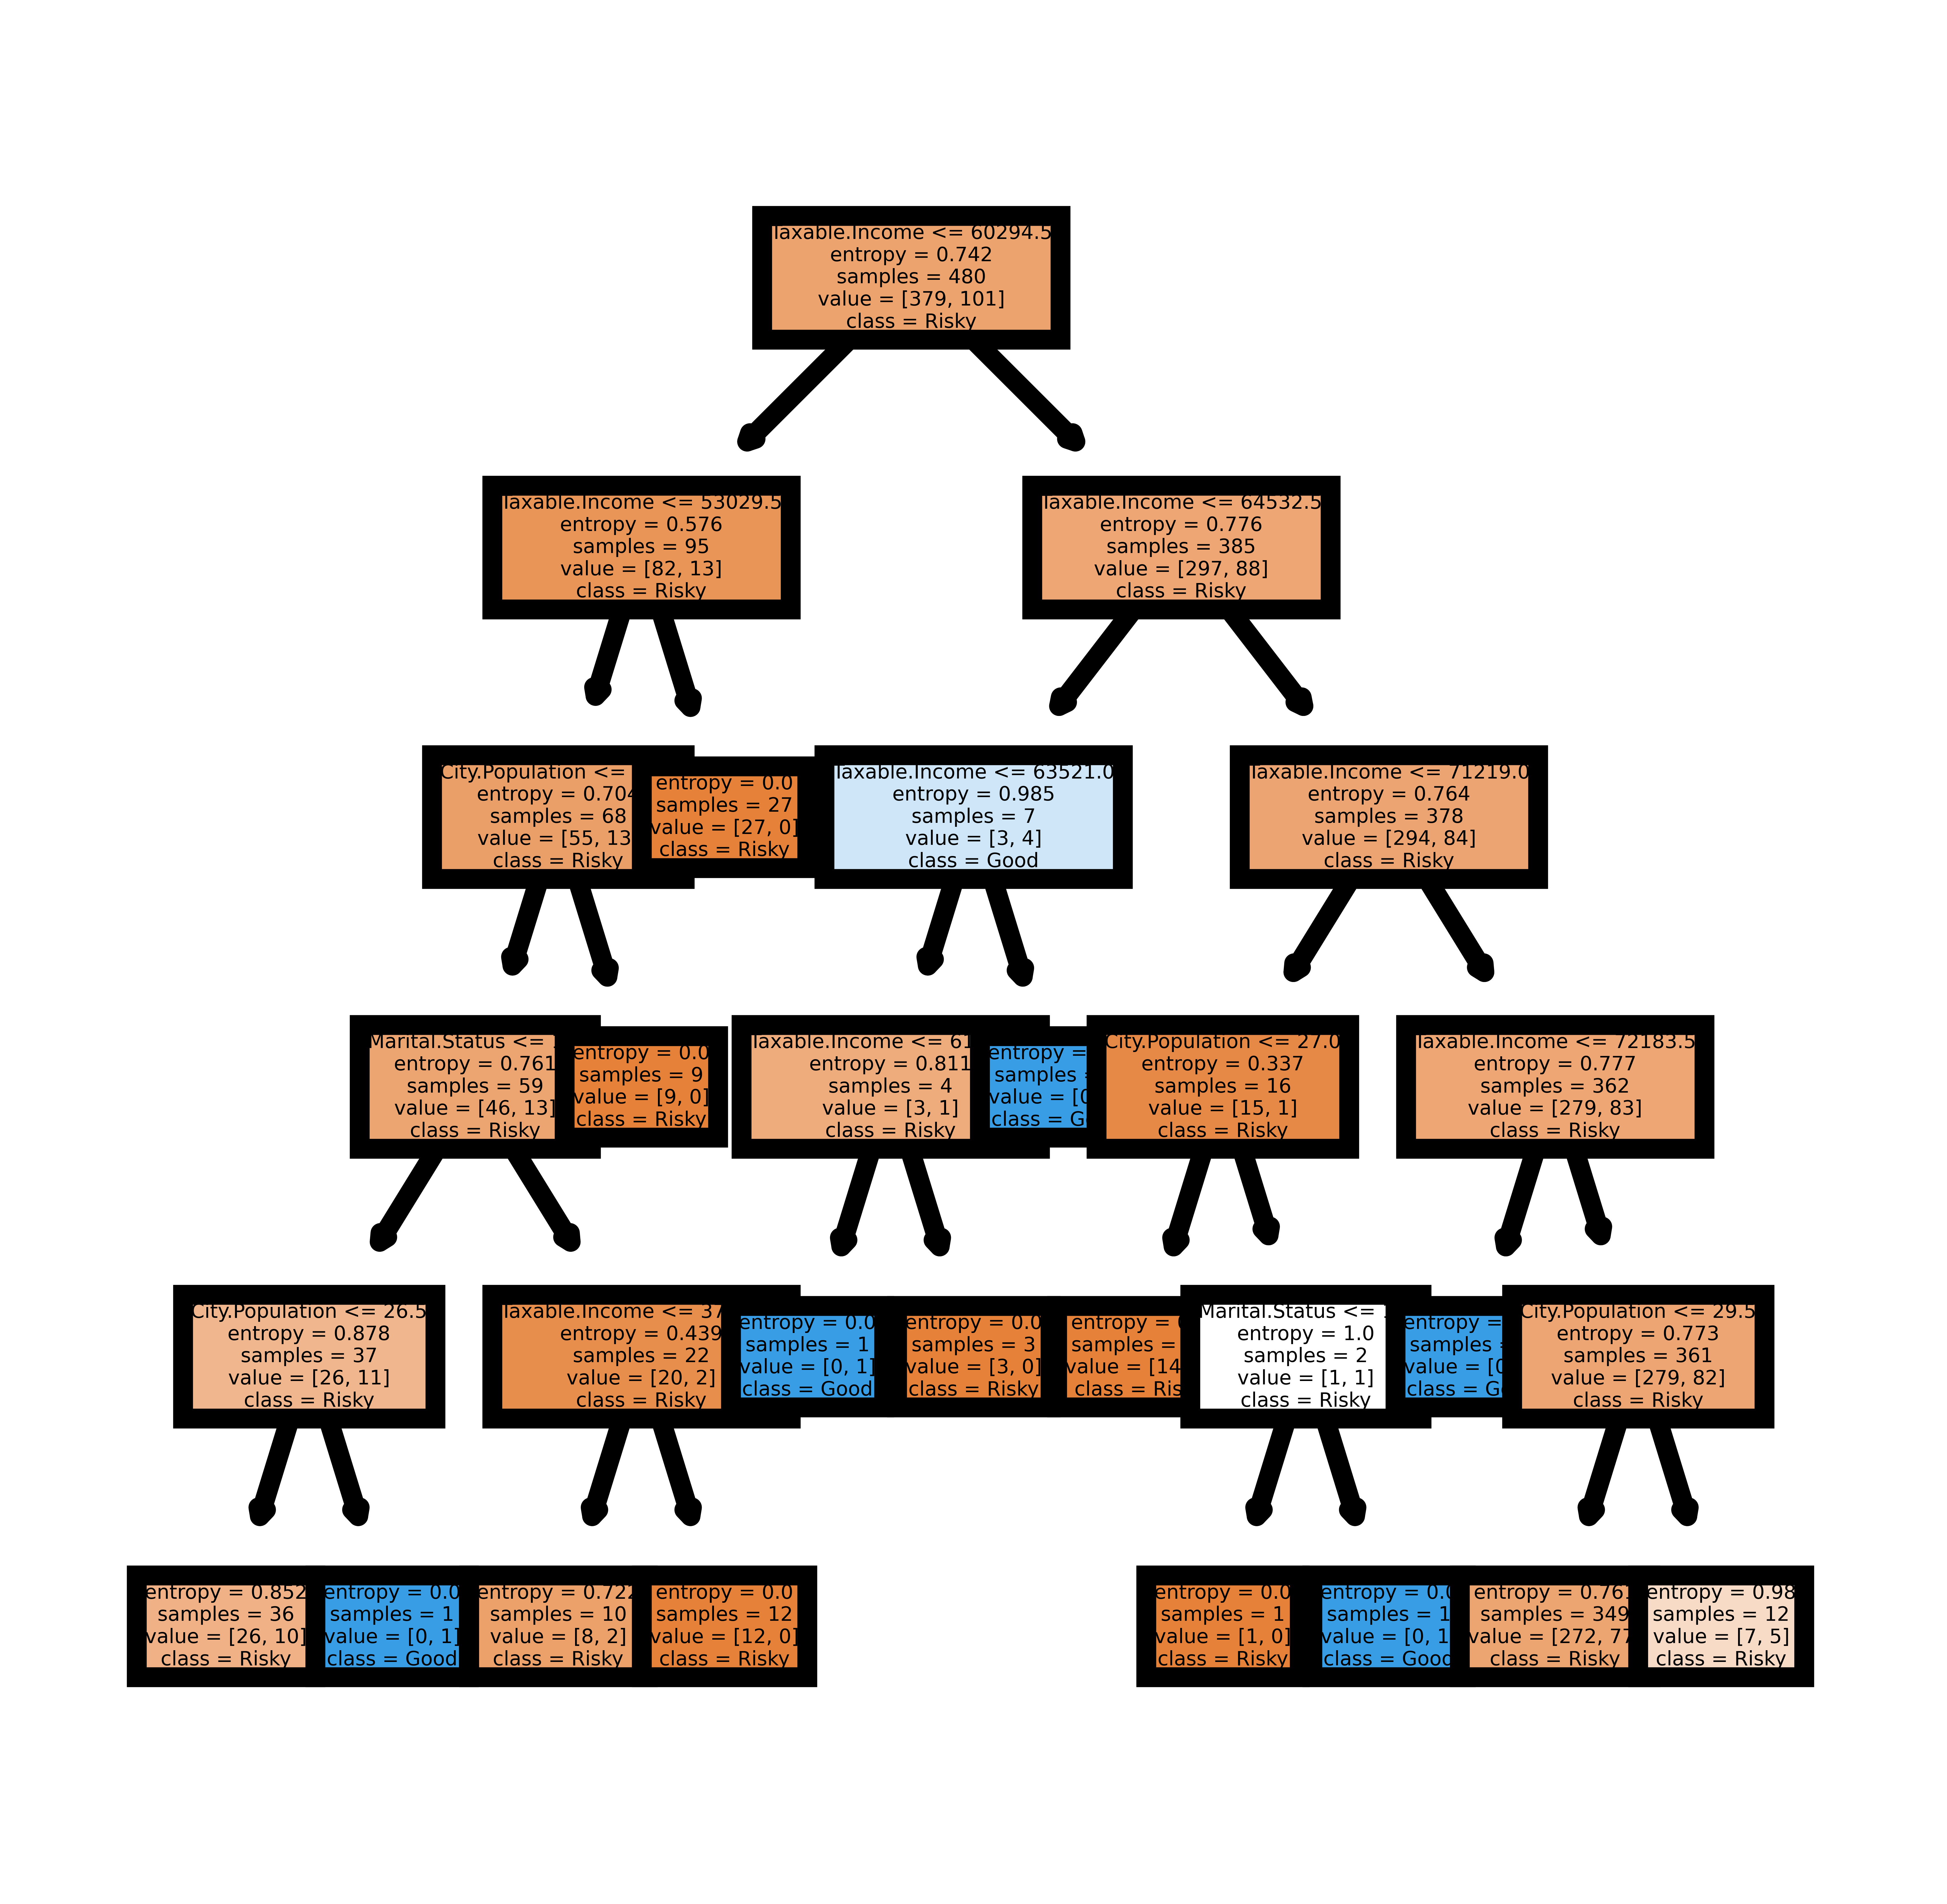

In [18]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","Urban"]
cn=["Risky","Good"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(1.5,1.5),dpi=5000)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [19]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

Good     117
Risky      3
dtype: int64

In [20]:
confusion_matrix(y_test,preds)

array([[95,  2],
       [22,  1]], dtype=int64)

In [21]:
# Accuracy 
accuracy_score(y_test,preds)

0.8

In [22]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})
df

,actual,predicted
310,Good,Good
114,Risky,Good
277,Good,Good
211,Good,Good
332,Good,Good
...,...,...
398,Risky,Risky
319,Good,Good
249,Good,Good
408,Good,Good


#Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [24]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.8